In [3]:
#モジュールインポート
import random
import math
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import seaborn as snsimport 
import openpyxl

#関数定義

def toutyakukannkaku(i):
    return RAND1[i] * a

def sabiszikan(i):
    return RAND(i) * b

def id(x):
    return x

def RAND(i):
    return random.random()

def toutyakukannkaku(i):
    return RAND1[i] * a

def sabiszikan(i):
    return RAND(i) * b

def ruisekitoutyaku(i):
    G.append(A[i])
    return sum(G)

def linear(x, a, b,c):
    return a*x**2 + b*x + c
    
def notlinear(x, a, b):
    return a*np.log(x) + b
    
def linear3(x,a,b,c,d):
    return a*x**3 + b*x**2 +c*x +d

def ulog(x,a,b,c): 
    return a*np.log(x + b) + c

def tapioka(x):
    return  param6[0] * x ** 3 + param6[1] * x ** 2 + param6[2] * x   +  param6[3]

def tyuros_integural(x):
    return  1/4 * param3[0] * x ** 4 + 1/3 * param3[1] * x ** 3 + 1/2 * param3[2] * x ** 2   +  param3[3] * x

def tapioka_integural(x):
    return  1/4 * param6[0] * x ** 4 + 1/3 * param6[1] * x ** 3 + 1/2 * param6[2] * x ** 2   +  param6[3] * x

def slog(x,a,b,c,d):
    return a*np.log(b*x + c) + d


def beep(freq, dur=100):
    import winsound
    winsound.Beep(freq, dur)

#試行回数
d = 100


#チュロスの格納値
T1 = []
T2 = []
T3 = []
T4 = []
T5 = []

p=0
result = []
result1 = []
result2 = []
result3 = []
result4 = []
result5 = []
result6 = []
result7 = []
result8 = []
result9 = []
result10 = []
result11 = []

k1 = []
k2 = []


for time in range(1,d+1):
    ID = [id(x) for x in range(1,279)]
    RAND1 = [RAND(i) for i in range(1,279)]
    RAND2 = [RAND(i) for i in range(1,279)]
    data = pd.DataFrame({"ID":ID,"RAND1":RAND1,
                             "RAND2":RAND2})
    #各地の値の確認
    λ = 30.778/60
    a = 1/λ
    μ = 40/60
    b = 1/μ
    #到着時間とサービスにかかる時間を算出
    G = []
    A = [toutyakukannkaku(i) for i in range(0,278)]
    B = [sabiszikan(i) for i in range(0,278)]
    F = [ruisekitoutyaku(i) for i in range(0,278)]
    data["到着間隔"] = A
    data["累積到着"] = F
    data["サービス時間"] = B
    #最初のお客さんの来店時間
    x1 = F[0]
    #最初のお客さんが出ていく時間
    y1 = F[0] + B[0]
    #お客さんの来店時間を収納する列をC、出ていく時間を収納する列をD
    C = []
    D = []
    C.append(x1)
    D.append(y1)
    #Fが累積到着、Bがサービス時間、待ち人数を求めていく
    for i in range(1,278):
        if F[i] < F[i-1] + B[i-1]:
            C.append(F[i-1] + B[i-1])
            D.append(F[i-1] +B[i-1] + B[i])
        else:
            C.append(F[i])
            D.append(F[i] + B[i])
    E1 = []
    data["サービス開始"] = C
    data["サービス終了"] = D
    for i in range(0,len(data)):
        if data.iloc[i,4] >= data.iloc[i,6]:
            E1.append(1)
        else:
            w = 1
            if i == len(data) - 1:
                E1.append(w)
            else:
                for s in range(1,len(data) - i):
                    if data.iloc[i+s,4] > data.iloc[i,6]:
                         if s ==len(data) - i - 1  :
                            E1.append(w)
                    else:
                        w += 1
                        if s ==len(data) - i - 1  :
                            E1.append(w)
    data["待ち人数"] = E1
    y = []
    x = 0
    for t in range(1,8):
        x += data["待ち人数"][data["待ち人数"] == t].count()/len(data)
        y.append(x)
    
    x = pd.Series([1,2,3,4,5,6,7])
    y  = y
    param1, cov = curve_fit(linear, x, y)
    linear_pred = param1[0] * x ** 2  + param1[1] * x +param1[2]
    param2, cov = curve_fit(notlinear, x, y)
    notlinear_pred = param2[0] * np.log(x)   +  param2[1]
    param3, cov = curve_fit(linear3, x, y)
    linear3_pred = param3[0] * x ** 3 + param3[1] * x ** 2 + param3[2] * x   +  param3[3]
    param_bounds = ((-np.inf,-1,-np.inf ), (np.inf, np.inf, np.inf))
    param10, cov = curve_fit(ulog, x, y,bounds=param_bounds,maxfev=1000)
    ulog_pred = param10[0]*np.log(x+param10[1]) + param10[2]

    T1.append(r2_score(y, notlinear_pred))
    T2.append(r2_score(y, linear_pred))
    T3.append(r2_score(y, linear3_pred))
    T4.append(r2_score(y, ulog_pred))

    if r2_score(y, notlinear_pred) >= 0.99 or r2_score(y, linear_pred) >= 0.99 or r2_score(y, linear3_pred) >= 0.99 or r2_score(y, ulog_pred) >= 0.99:
        r_max = max(r2_score(y, notlinear_pred),r2_score(y, linear_pred),r2_score(y, linear3_pred),r2_score(y, ulog_pred))
        if r_max == r2_score(y, notlinear_pred):
            print("超えた!!",time,"回目のR2値は非線形で",r2_score(y, notlinear_pred))
            name = "notlinear"
            def pred(x):
                return param2[0]*(x*np.log(x) + x)   +  param2[1] * x 
            result11.append(pred(7)-pred(1))
            
            
        elif r_max == r2_score(y, linear_pred):
            print("超えた!!",time,"回目のR2値は線形で",r2_score(y, linear_pred))
            def pred(x):
                1/3 * param1[0] * x ** 3  +  1/2 *param1[1] * x ** 2 + param1[2] * x
            name = "linear"
            result11.append(pred(7)-pred(1))
            
        elif r_max == r2_score(y, ulog_pred):
            print("超えた!!",time,"回目のR2値は対数で",r2_score(y, ulog_pred))
            name = "log"
            def pred(x):
                return param10[0]*np.log(x+param10[1]) + param10[2]
            result11.append(pred(7)-pred(1))
            
        else:
            print("超えた!!",time,"回目のR2値は三乗式で",r2_score(y, linear3_pred))
            name = "linear3"
            def pred(x):
                return 1/4 * param3[0] * x ** 4 + 1/3 * param3[1] * x ** 3 + 1/2*param3[2] * x ** 2   +  param3[3] * x
            result11.append(pred(7)-pred(1))
        
        result.append(time)
        result1.append(y[0])
        result2.append(y[1])
        result3.append(y[2])
        result4.append(y[3])
        result5.append(y[4])
        result6.append(y[5])
        result7.append(y[6])
        result8.append(max(r2_score(y, notlinear_pred),r2_score(y, linear_pred),r2_score(y, linear3_pred),r2_score(y, ulog_pred)))
        result9.append(name)
        result10.append(sum(data["待ち人数"])/len(data))
        k1.append(data)
        p += 1

        
result_data = pd.DataFrame({"指数関数型モデル":T1,"二次関数型モデル":T2,"三次関数型モデル":T3,"対数関数型モデル":T4})
result_data.to_csv("resultdata.csv")

beep(2000, 500)
beep(2000, 500)
beep(2000, 500)
beep(2000, 500)
beep(2000, 500)
print("チュロスが終了しました")



dt = pd.DataFrame({"回数":result,"一人":result1,"二人":result2,"三人":result3,
                   "四人":result4,"五人":result5,"六人":result6,"七人":result7,
                  "R2値":result8,"モデル":result9,"平均値":result10,"S":result11})
dt_T = dt.T
x = pd.Series([1,2,3,4,5,6,7])
y = dt_T.iloc[1:8,0]



超えた!! 2 回目のR2値は対数で 0.9921323815348082
超えた!! 3 回目のR2値は対数で 0.9904778813179239
超えた!! 4 回目のR2値は対数で 0.9901816149299736
超えた!! 7 回目のR2値は対数で 0.9954774001226289
超えた!! 8 回目のR2値は対数で 0.9910825913066904
超えた!! 9 回目のR2値は対数で 0.9916308137451235
超えた!! 10 回目のR2値は三乗式で 0.9947145877378437
超えた!! 12 回目のR2値は対数で 0.9974214362716465
超えた!! 13 回目のR2値は三乗式で 0.9979194042925975
超えた!! 14 回目のR2値は対数で 0.9988197053548233
超えた!! 15 回目のR2値は三乗式で 0.9941641774532585
超えた!! 18 回目のR2値は対数で 0.9976483594104537
超えた!! 19 回目のR2値は対数で 0.9945051196257398
超えた!! 20 回目のR2値は対数で 0.9921323815348082
超えた!! 21 回目のR2値は対数で 0.9975567561153592
超えた!! 23 回目のR2値は対数で 0.9969923345320653
超えた!! 24 回目のR2値は対数で 0.9909757528228946
超えた!! 25 回目のR2値は対数で 0.9980339589687037
超えた!! 27 回目のR2値は三乗式で 0.9913793103448275
超えた!! 28 回目のR2値は三乗式で 0.9962216624685138
超えた!! 29 回目のR2値は対数で 0.9957813728514139
超えた!! 30 回目のR2値は三乗式で 0.9904042466312779
超えた!! 31 回目のR2値は対数で 0.9939024938138817
超えた!! 32 回目のR2値は対数で 0.9983876066085244
超えた!! 33 回目のR2値は三乗式で 0.9932683379758586
超えた!! 35 回目のR2値は三乗式で 0.9

In [10]:
dt["モデル"].value_counts()

log        57
linear3    15
Name: モデル, dtype: int64

In [5]:
#タピオカ用コード
T1 = []
T2 = []
T3 = []
T4 = []

p=0
result_t = []
result1_t = []
result2_t = []
result3_t = []
result4_t = []
result5_t = []
result6_t = []
result7_t = []
result8_t = []
result9_t = []
result10_t = []
result11_t = []


for time in range(1,d+1):
    ID = [id(x) for x in range(1,279)]
    RAND1 = [RAND(i) for i in range(1,279)]
    RAND2 = [RAND(i) for i in range(1,279)]
    data = pd.DataFrame({"ID":ID,"RAND1":RAND1,
                             "RAND2":RAND2})
    #各地の値の確認
    λ = 36/60
    a = 1/λ
    μ = 60/60
    b = 1/μ
    #到着時間とサービスにかかる時間を算出
    G = []
    A = [toutyakukannkaku(i) for i in range(0,278)]
    B = [sabiszikan(i) for i in range(0,278)]
    F = [ruisekitoutyaku(i) for i in range(0,278)]
    data["到着間隔"] = A
    data["累積到着"] = F
    data["サービス時間"] = B
    #最初のお客さんの来店時間
    x1 = F[0]
    #最初のお客さんが出ていく時間
    y1 = F[0] + B[0]
    #お客さんの来店時間を収納する列をC、出ていく時間を収納する列をD
    C = []
    D = []
    C.append(x1)
    D.append(y1)
    #Fが累積到着、Bがサービス時間、待ち人数を求めていく
    for i in range(1,278):
        if F[i] < F[i-1] + B[i-1]:
            C.append(F[i-1] + B[i-1])
            D.append(F[i-1] +B[i-1] + B[i])
        else:
            C.append(F[i])
            D.append(F[i] + B[i])
    E1 = []
    data["サービス開始"] = C
    data["サービス終了"] = D
    for i in range(0,len(data)):
        if data.iloc[i,4] >= data.iloc[i,6]:
            E1.append(1)
        else:
            w = 1
            if i == len(data) - 1:
                E1.append(w)
            else:
                for s in range(1,len(data) - i):
                    if data.iloc[i+s,4] > data.iloc[i,6]:
                         if s ==len(data) - i - 1  :
                            E1.append(w)
                    else:
                        w += 1
                        if s ==len(data) - i - 1  :
                            E1.append(w)
    data["待ち人数"] = E1
    y = []
    x = 0
    for t in range(1,8):
        x += data["待ち人数"][data["待ち人数"] == t].count()/len(data)
        y.append(x)
    x = pd.Series([1,2,3,4,5,6,7])
    y  = y
    param1, cov = curve_fit(linear, x, y)
    linear_pred = param1[0] * x ** 2  + param1[1] * x +param1[2]
    param2, cov = curve_fit(notlinear, x, y)
    notlinear_pred = param2[0] * np.log(x)   +  param2[1]
    param3, cov = curve_fit(linear3, x, y)
    linear3_pred = param3[0] * x ** 3 + param3[1] * x ** 2 + param3[2] * x   +  param3[3]
    param12, cov = curve_fit(ulog, x, y,bounds=param_bounds,maxfev=1000)
    ulog_pred = param12[0]*np.log(x+param12[1]) + param12[2]

    T1.append(r2_score(y, notlinear_pred))
    T2.append(r2_score(y, linear_pred))
    T3.append(r2_score(y, linear3_pred))
    T4.append(r2_score(y, ulog_pred))
    

    if r2_score(y, notlinear_pred) >= 0.99 or r2_score(y, linear_pred) >= 0.99 or r2_score(y, linear3_pred) >= 0.99 or r2_score(y, ulog_pred) >= 0.99:
        r_max = max(r2_score(y, notlinear_pred),r2_score(y, linear_pred),r2_score(y, linear3_pred),r2_score(y, ulog_pred))
        if r_max == r2_score(y, notlinear_pred):
            print("超えた!!",time,"回目のR2値は非線形で",r2_score(y, notlinear_pred))
            name = "notlinear"
            def pred(x):
                return param2[0]*(x*np.log(x) + x)   +  param2[1] * x 
            result11_t.append(pred(7)-pred(1))
            
            
        elif r_max == r2_score(y, linear_pred):
            print("超えた!!",time,"回目のR2値は線形で",r2_score(y, linear_pred))
            def pred(x):
                1/3 * param1[0] * x ** 3  +  1/2 *param1[1] * x ** 2 + param1[2] * x
            name = "linear"
            result11_t.append(pred(7)-pred(1))
            
        elif r_max == r2_score(y, ulog_pred):
            print("超えた!!",time,"回目のR2値は対数で",r2_score(y, ulog_pred))
            name = "log"
            def pred(x):
                return param12[0]*np.log(x+param12[1]) + param12[2]
            result11_t.append(pred(7)-pred(1))
            
        else:
            print("超えた!!",time,"回目のR2値は三乗式で",r2_score(y, linear3_pred))
            name = "linear3"
            def pred(x):
                return 1/4 * param3[0] * x ** 4 + 1/3 * param3[1] * x ** 3 + 1/2*param3[2] * x ** 2   +  param3[3] * x
            result11_t.append(pred(7)-pred(1))
        result_t.append(time)
        result1_t.append(y[0])
        result2_t.append(y[1])
        result3_t.append(y[2])
        result4_t.append(y[3])
        result5_t.append(y[4])
        result6_t.append(y[5])
        result7_t.append(y[6])
        result8_t.append(max(r2_score(y, notlinear_pred),r2_score(y, linear_pred),r2_score(y, linear3_pred)))
        result9_t.append(name)
        k2.append(data)
        p += 1

        
result_data_t = pd.DataFrame({"指数関数型モデル":T1,"二次関数型モデル":T2,"三次関数型モデル":T3,"対数関数型モデル":T4})
result_data_t.to_csv("resultdata_tapioka.csv")
dt_tt = pd.DataFrame({"回数":result_t,"一人":result1_t,"二人":result2_t,"三人":result3_t,
                   "四人":result4_t,"五人":result5_t,"六人":result6_t,"七人":result7_t,
                  "R2値":result8_t,"モデル":result9_t,"pred":result11_t})

超えた!! 1 回目のR2値は対数で 0.9975566580576302
超えた!! 3 回目のR2値は対数で 0.9938914855261528
超えた!! 4 回目のR2値は対数で 0.9939128464158187
超えた!! 5 回目のR2値は対数で 0.9979882567307369
超えた!! 6 回目のR2値は対数で 0.9941758357354076
超えた!! 7 回目のR2値は対数で 0.9914545416559714
超えた!! 8 回目のR2値は対数で 0.9976632872512702
超えた!! 9 回目のR2値は対数で 0.9959955024450188
超えた!! 11 回目のR2値は対数で 0.9939128464158187
超えた!! 13 回目のR2値は対数で 0.9922893316824087
超えた!! 15 回目のR2値は対数で 0.9946303204394988
超えた!! 16 回目のR2値は対数で 0.9978221050396914
超えた!! 17 回目のR2値は対数で 0.9946533971712932
超えた!! 18 回目のR2値は対数で 0.9973121297398181
超えた!! 19 回目のR2値は対数で 0.9904778813179237
超えた!! 20 回目のR2値は対数で 0.9940915947173738
超えた!! 21 回目のR2値は対数で 0.9938914855261528
超えた!! 22 回目のR2値は対数で 0.9930082821746726
超えた!! 23 回目のR2値は対数で 0.9979993508259873
超えた!! 24 回目のR2値は対数で 0.9944018623636184
超えた!! 26 回目のR2値は対数で 0.9920412370409376
超えた!! 27 回目のR2値は対数で 0.9904778813179237
超えた!! 29 回目のR2値は対数で 0.9986968807201728
超えた!! 30 回目のR2値は対数で 0.9946533971712932
超えた!! 31 回目のR2値は対数で 0.9944474605586303
超えた!! 32 回目のR2値は対数で 0.99228933168

In [8]:
dt_tt["モデル"].value_counts()

log        66
linear3     9
Name: モデル, dtype: int64

In [22]:
dt["S"]

0     0.121953
1     0.088929
2     0.097650
3     0.095612
4     0.114758
        ...   
67    0.088929
68    0.143536
69    0.088279
70    5.876413
71    5.920863
Name: S, Length: 72, dtype: float64

In [11]:
%load_ext Cython

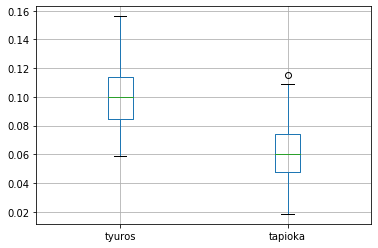

In [74]:
use_data_tyuros = dt[dt["モデル"]=="log"]
use_data_tapioka = dt_tt[dt_tt["モデル"]=="log"]

tt = pd.DataFrame({"tyuros":use_data_tyuros["S"],"tapioka":use_data_tapioka["pred"]})
tt.boxplot()

In [20]:
len(use_data_tyuros),len(use_data_tapioka)

(57, 66)

In [55]:
def trying():
    X = []
    for i in range(len(use_data_tyuros)):
        for s in range(len(use_data_tapioka)):
            X.append(abs(use_data_tapioka.iloc[s,10]-use_data_tyuros.iloc[i,11]))
    return X

In [56]:
trying()

[0.07799898089497492,
 0.07726806611892001,
 0.06669668396811901,
 0.052140075954335674,
 0.0372701448420627,
 0.05165872811514094,
 0.06683672827561038,
 0.03690093068306333,
 0.06669668396811901,
 0.048061591176780105,
 0.06259035745435282,
 0.03021584617464501,
 0.06309957291307677,
 0.07043385907353983,
 0.055255876386346436,
 0.08112032944083392,
 0.07726806611892001,
 0.0702937908812925,
 0.07463282246977954,
 0.09228740558807436,
 0.012944233547896533,
 0.055255876386346436,
 0.04885114241680644,
 0.06309957291307677,
 0.088704767584604,
 0.048061591176780105,
 0.04086108659934651,
 0.10341859965877198,
 0.07726806611892001,
 0.04460450437093921,
 0.051150005715561386,
 0.06688529026729217,
 0.03715900469795086,
 0.07423919887362906,
 0.05939209184192484,
 0.006685367967468991,
 0.06688529026729217,
 0.0702937908812925,
 0.05165872811514094,
 0.06625593211776992,
 0.051150005715561386,
 0.05876240126926213,
 0.08476868835594509,
 0.08476868835594509,
 0.09972031487956046,
 0.074

In [52]:
abs(use_data_tapioka.iloc[31,10]-use_data_tyuros.iloc[31,11])


0.0548577646312326

In [54]:
X = []
for i in range(len(use_data_tyuros)):
    for s in range(len(use_data_tapioka)):
        X.append(abs(use_data_tapioka.iloc[s,10]-use_data_tyuros.iloc[i,11]))

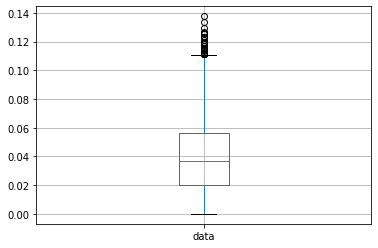

In [59]:
import matplotlib.pyplot as plt

data=pd.DataFrame({"data":X})
data.boxplot()

In [62]:
data.describe()

,data
count,3762.000000
mean,0.040010
std,0.025208
min,0.000000
25%,0.020181
50%,0.037159
75%,0.056402
max,0.137601


In [71]:
x = len(data[data["data"] <0.1])
print(x/len(data))

0.9821903242955875
